In [8]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516
Receiving objects: 100% (2516/2516), 8.20 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [9]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [10]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=25e5d9d16f8e626435b74afed6a475abfe2a3288ed2e1e86ba5df6bb43bec3c4
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Make Pair to Pair dataset of each image

In [16]:
!python datasets/combine_A_and_B.py --fold_A /kaggle/input/irregular-shapes/test/input --fold_B /kaggle/input/irregular-shapes/test/target --fold_AB /kaggle/working/combined_dataset/test

[fold_A] =  /kaggle/input/irregular-shapes/test/input
[fold_B] =  /kaggle/input/irregular-shapes/test/target
[fold_AB] =  /kaggle/working/combined_dataset/test
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = circle, use 125/125 images
split = circle, number of images = 125
split = square, use 125/125 images
split = square, number of images = 125
split = mixed, use 1250/1250 images
split = mixed, number of images = 1250
split = hexagon, use 125/125 images
split = hexagon, number of images = 125
split = rectangle, use 125/125 images
split = rectangle, number of images = 125
split = line, use 125/125 images
split = line, number of images = 125
split = ellipse, use 125/125 images
split = ellipse, number of images = 125
split = irregular, use 125/125 images
split = irregular, number of images = 125
split = star, use 125/125 images
split = star, number of images = 125


In [15]:
!python datasets/combine_A_and_B.py --fold_A /kaggle/input/irregular-shapes/train/input --fold_B /kaggle/input/irregular-shapes/train/target --fold_AB /kaggle/working/combined_dataset/train

[fold_A] =  /kaggle/input/irregular-shapes/train/input
[fold_B] =  /kaggle/input/irregular-shapes/train/target
[fold_AB] =  /kaggle/working/combined_dataset/train
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = circle, use 1000/1000 images
split = circle, number of images = 1000
split = square, use 1000/1000 images
split = square, number of images = 1000
split = mixed, use 10000/10000 images
split = mixed, number of images = 10000
split = hexagon, use 1000/1000 images
split = hexagon, number of images = 1000
split = rectangle, use 1000/1000 images
split = rectangle, number of images = 1000
split = line, use 1000/1000 images
split = line, number of images = 1000
split = ellipse, use 1000/1000 images
split = ellipse, number of images = 1000
split = irregular, use 1000/1000 images
split = irregular, number of images = 1000
split = star, use 1000/1000 images
split = star, number of images = 1000


In [13]:
!python datasets/combine_A_and_B.py --fold_A /kaggle/input/irregular-shapes/valid/input --fold_B /kaggle/input/irregular-shapes/valid/target --fold_AB /kaggle/working/combined_dataset/val

[fold_A] =  /kaggle/input/irregular-shapes/valid/input
[fold_B] =  /kaggle/input/irregular-shapes/valid/target
[fold_AB] =  /kaggle/working/combined_dataset/val
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = circle, use 125/125 images
split = circle, number of images = 125
split = square, use 125/125 images
split = square, number of images = 125
split = mixed, use 1250/1250 images
split = mixed, number of images = 1250
split = hexagon, use 125/125 images
split = hexagon, number of images = 125
split = rectangle, use 125/125 images
split = rectangle, number of images = 125
split = line, use 125/125 images
split = line, number of images = 125
split = ellipse, use 125/125 images
split = ellipse, number of images = 125
split = irregular, use 125/125 images
split = irregular, number of images = 125
split = star, use 125/125 images
split = star, number of images = 125


# Visualisation of each image pair

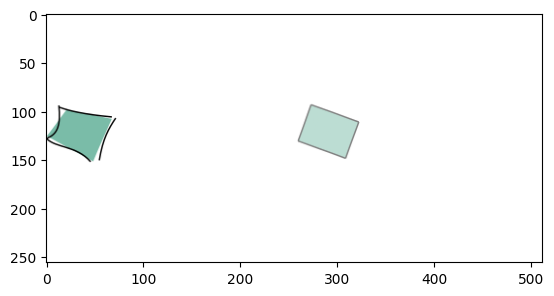

In [14]:
import matplotlib.pyplot as plt

img = plt.imread('/kaggle/working/combined_dataset/val/rectangle/rectangle_33.png')

plt.imshow(img)

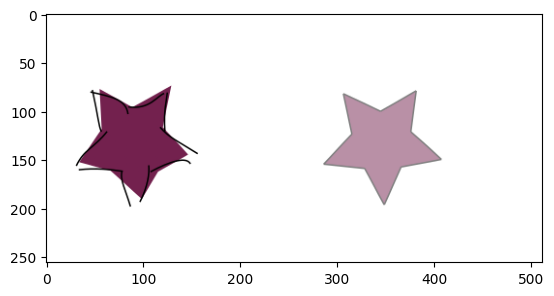

In [20]:
import matplotlib.pyplot as plt

img = plt.imread('/kaggle/working/combined_dataset/test/star/star_32.png')

plt.imshow(img)

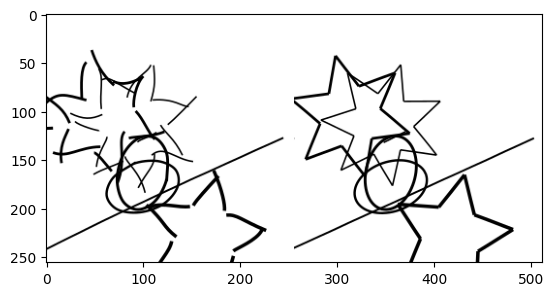

In [21]:
import matplotlib.pyplot as plt

img = plt.imread('/kaggle/working/combined_dataset/train/mixed/mixed_1231.png')

plt.imshow(img)

# Training Pix2Pix model 

In [ ]:
!python train.py --dataroot /kaggle/combined_dataset --name adobe_pix2pix --model pix2pix --direction AtoB --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /kaggle/combined_dataset      	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing model

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot /kaggle/combined_dataset --direction AtoB --model pix2pix --name adobe_pix2pix